In [2]:
import geopandas as gpd
import folium

# Read the GeoJSON file
geojson_file = 'geojson.json'
gdf = gpd.read_file(geojson_file)

# Create a map centered around the centroid of the GeoDataFrame with Stamen Watercolor style
center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
m = folium.Map(location=center, zoom_start=14)

# Add the GeoDataFrame to the map
folium.GeoJson(gdf).add_to(m)

# Display the map
m

/var/folders/zp/r_synnss3dnc2lgwfbyr07h80000gn/T/ipykernel_1805/862522175.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


In [3]:
import pandas as pd
scenario_names = ['baseline', 'car-free', 'one-way']

car_free_trips = pd.read_csv('scenario-data/' + scenario_names[1] + f'/{scenario_names[1]}_trip_table.csv')
baseline_trips = pd.read_csv('scenario-data/' + scenario_names[0] + f'/{scenario_names[0]}_trip_table.csv')
one_way_trips = pd.read_csv('scenario-data/' + scenario_names[2] + f'/{scenario_names[2]}_trip_table.csv')

# Divide all duration fields by 60
car_free_trips['duration'] = car_free_trips['duration'] / 60
baseline_trips['duration'] = baseline_trips['duration'] / 60
one_way_trips['duration'] = one_way_trips['duration'] / 60



In [4]:
car_free_trips['duration'].describe()

count    10083.000000
mean        11.969914
std          7.311698
min          0.094727
25%          6.759390
50%         10.172077
75%         15.455957
max         62.941072
Name: duration, dtype: float64

In [5]:
baseline_trips['duration'].describe()

count    10103.000000
mean        11.834358
std          7.459981
min          0.094727
25%          6.517274
50%          9.945082
75%         15.428667
max        103.200297
Name: duration, dtype: float64

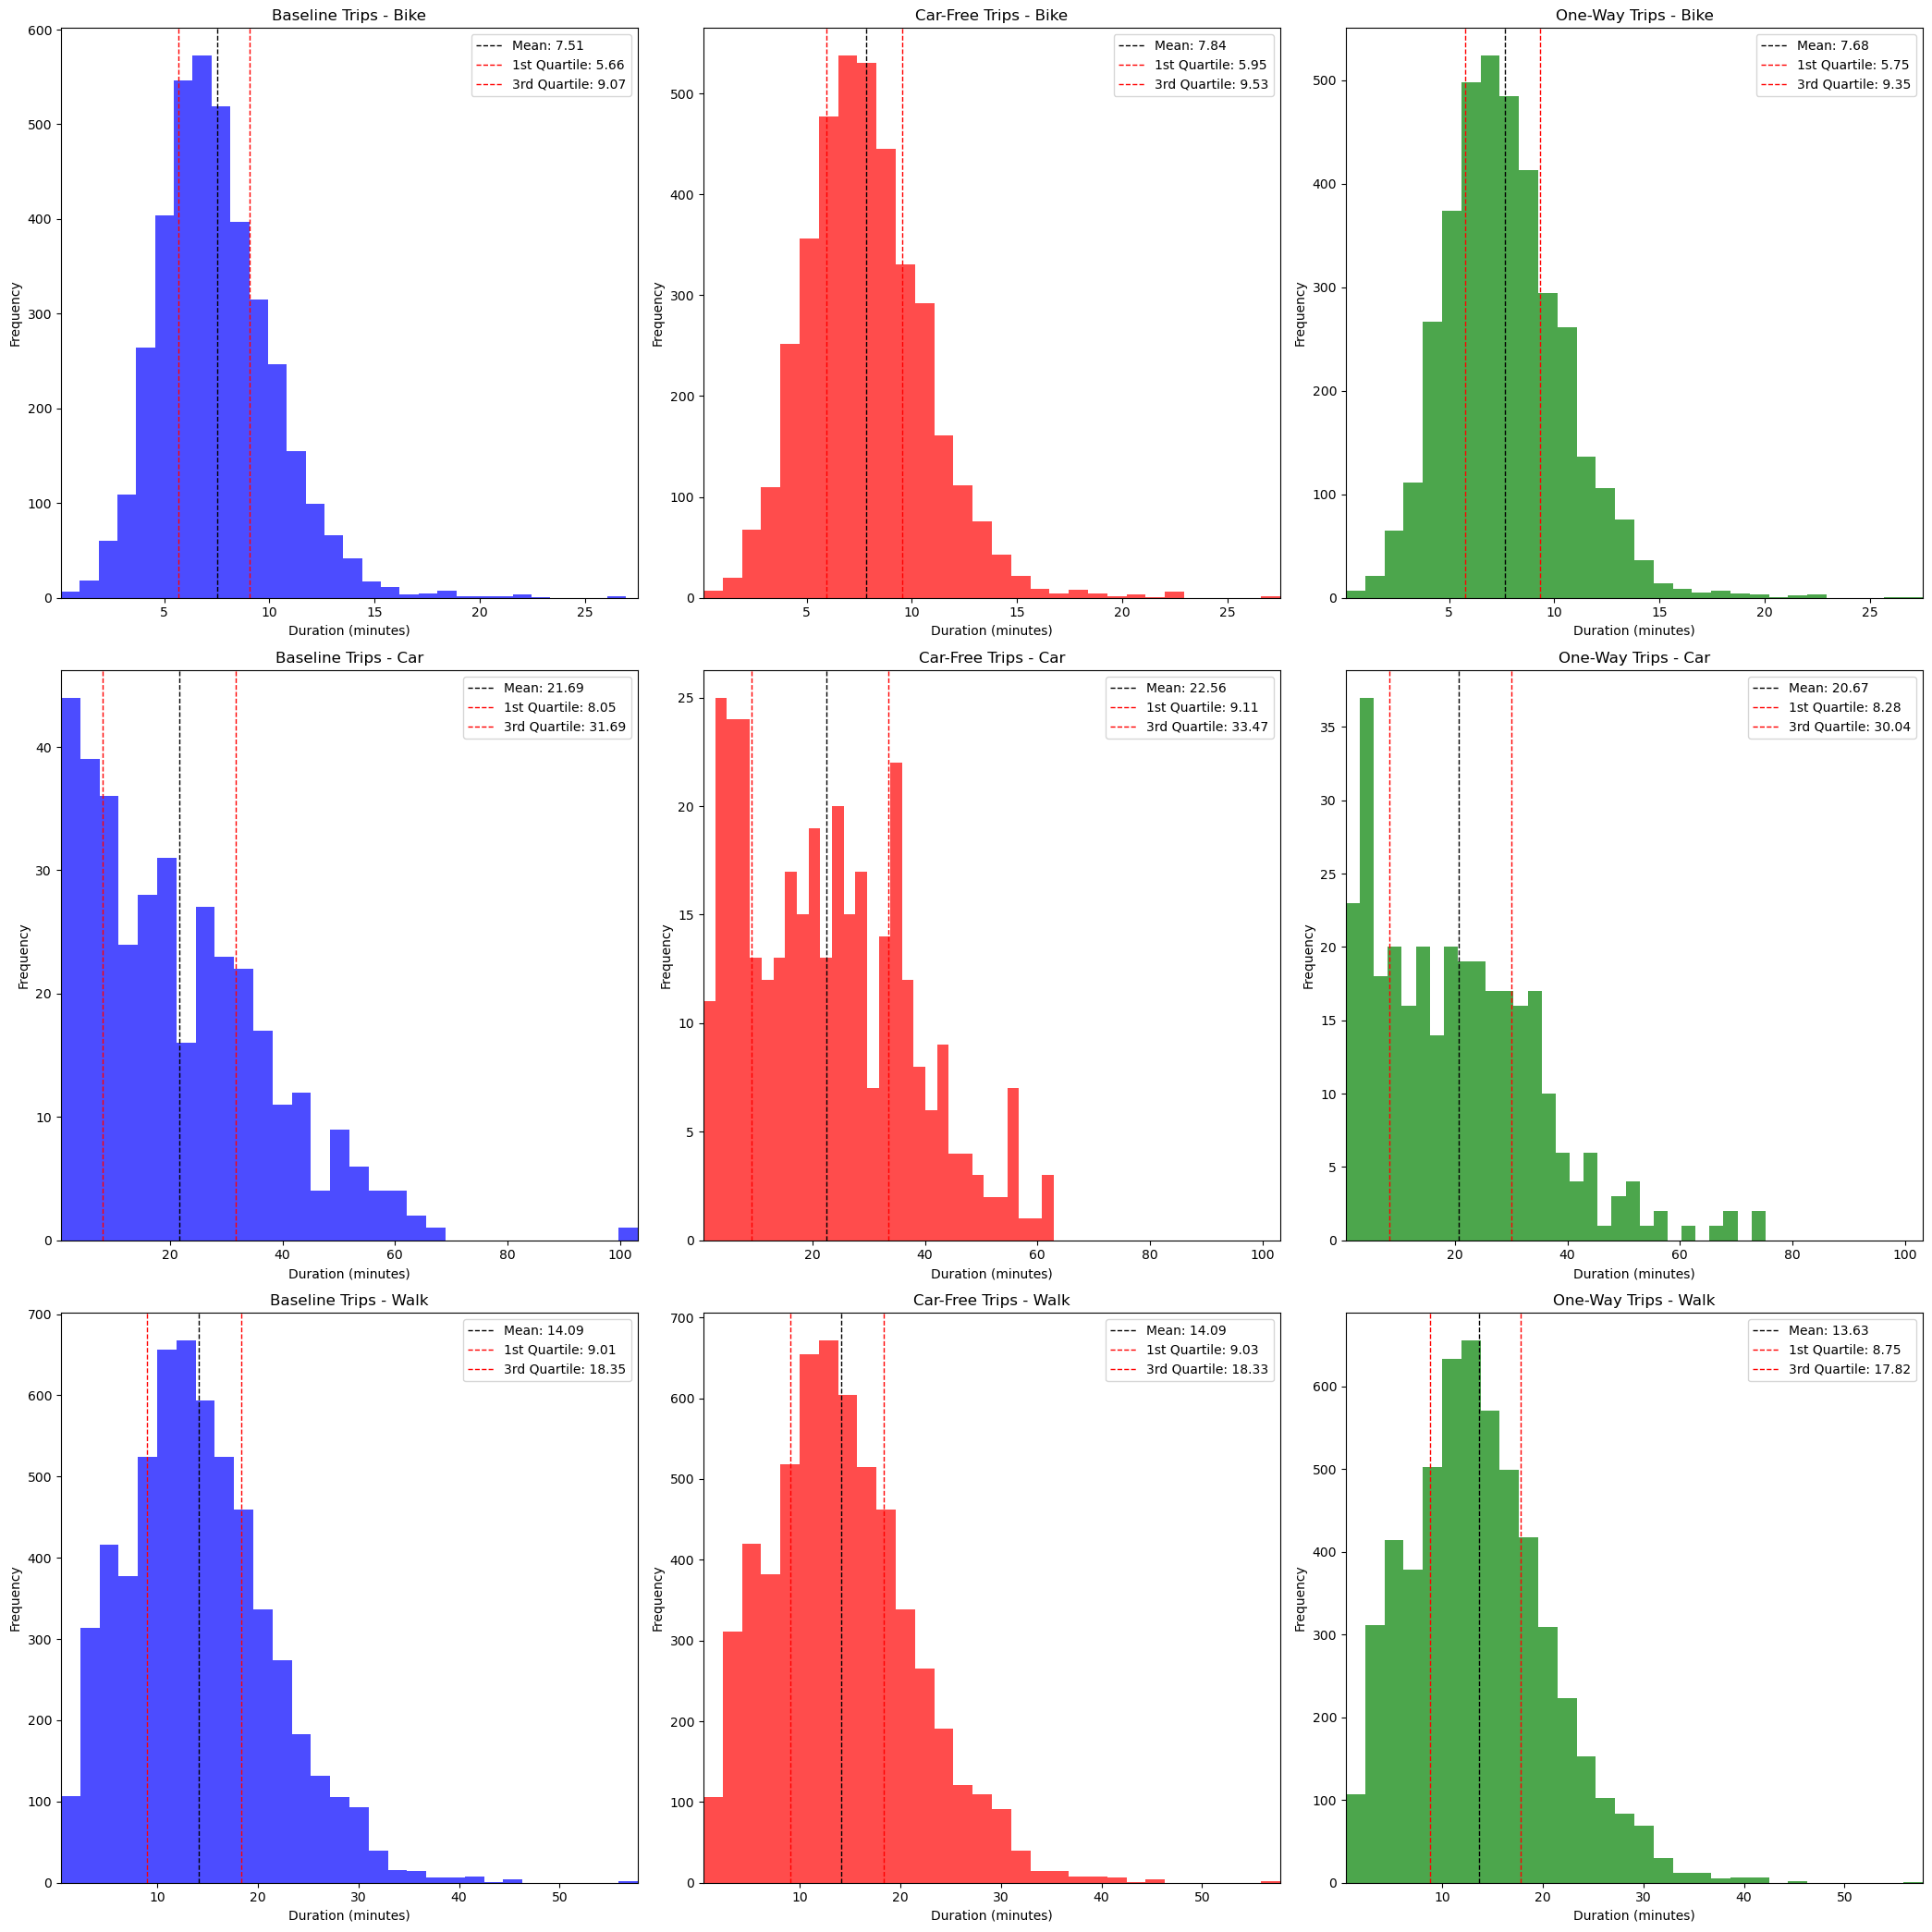

In [6]:
import matplotlib.pyplot as plt

# Filter the trips where mode is "Bike", "Car", and "Walk"
baseline_bike = baseline_trips[baseline_trips['mode'] == 'Bike']
car_free_bike = car_free_trips[car_free_trips['mode'] == 'Bike']
one_way_bike = one_way_trips[one_way_trips['mode'] == 'Bike']
baseline_car = baseline_trips[baseline_trips['mode'] == 'Drive']
car_free_car = car_free_trips[car_free_trips['mode'] == 'Drive']
one_way_car = one_way_trips[one_way_trips['mode'] == 'Drive']
baseline_walk = baseline_trips[baseline_trips['mode'] == 'Walk']
car_free_walk = car_free_trips[car_free_trips['mode'] == 'Walk']
one_way_walk = one_way_trips[one_way_trips['mode'] == 'Walk']

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(21, 21))

# Plot the distribution of duration for baseline, car-free, and one-way trips for each mode
modes = ['Bike', 'Car', 'Walk']
baseline_data = [baseline_bike, baseline_car, baseline_walk]
car_free_data = [car_free_bike, car_free_car, car_free_walk]
one_way_data = [one_way_bike, one_way_car, one_way_walk]
colors = ['blue', 'red', 'green']

for i, mode in enumerate(modes):
    data = [baseline_data[i], car_free_data[i], one_way_data[i]]
    scenario_titles = ['Baseline', 'Car-Free', 'One-Way']
    
    # Determine the x-axis limits
    min_duration = min(d['duration'].min() for d in data)
    max_duration = max(d['duration'].max() for d in data)
    
    for j, scenario in enumerate(scenario_titles):
        axes[i, j].hist(data[j]['duration'], bins=30, alpha=0.7, color=colors[j])
        axes[i, j].set_title(f'{scenario} Trips - {mode}')
        axes[i, j].set_xlabel('Duration (minutes)')
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].set_xlim(min_duration, max_duration)
        
        mean_duration = data[j]['duration'].mean()
        q1_duration = data[j]['duration'].quantile(0.25)
        q3_duration = data[j]['duration'].quantile(0.75)
        
        axes[i, j].axvline(mean_duration, color='k', linestyle='dashed', linewidth=1)
        axes[i, j].axvline(q1_duration, color='r', linestyle='dashed', linewidth=1)
        axes[i, j].axvline(q3_duration, color='r', linestyle='dashed', linewidth=1)
        
        axes[i, j].legend([f'Mean: {mean_duration:.2f}', f'1st Quartile: {q1_duration:.2f}', f'3rd Quartile: {q3_duration:.2f}'])

# Show the plot
plt.tight_layout()
plt.show()


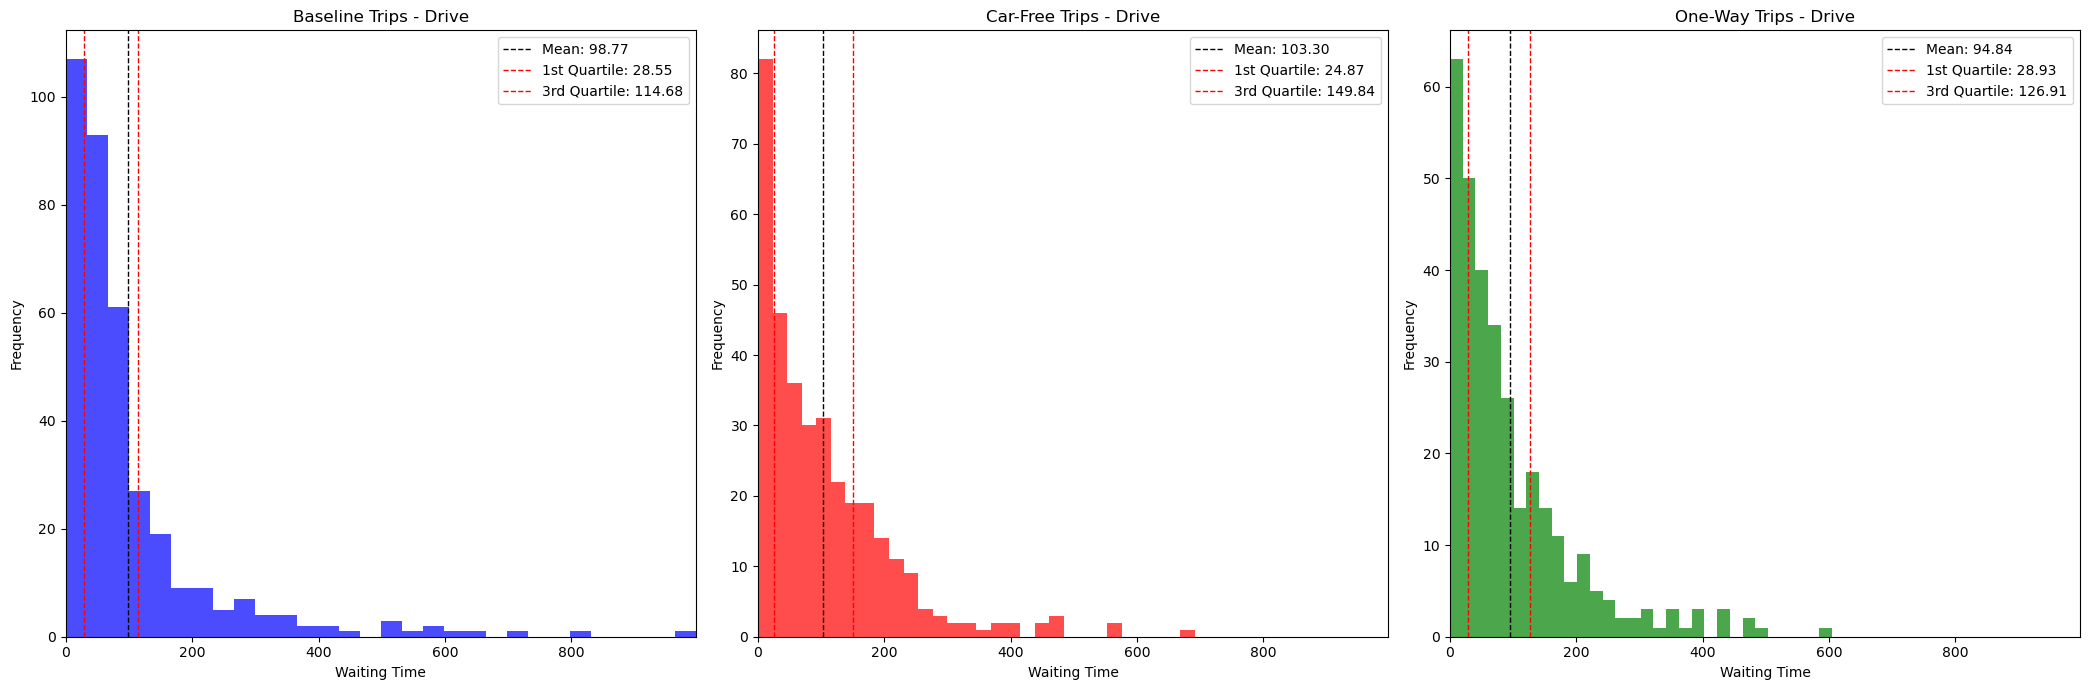

In [7]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

# Plot the distribution of waiting_time for baseline, car-free, and one-way trips for mode 'Drive'
scenarios = ['Baseline', 'Car-Free', 'One-Way']
data = [baseline_car, car_free_car, one_way_car]
colors = ['blue', 'red', 'green']

for i, scenario in enumerate(scenarios):
    # Determine the x-axis limits
    min_waiting_time = min(data[i]['waiting_time'].min() for i in range(3))
    max_waiting_time = max(data[i]['waiting_time'].max() for i in range(3))

    # Plot the histogram
    axes[i].hist(data[i]['waiting_time'], bins=30, alpha=0.7, color=colors[i])
    axes[i].set_title(f'{scenario} Trips - Drive')
    axes[i].set_xlabel('Waiting Time')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(min_waiting_time, max_waiting_time)
    
    mean_waiting_time = data[i]['waiting_time'].mean()
    q1_waiting_time = data[i]['waiting_time'].quantile(0.25)
    q3_waiting_time = data[i]['waiting_time'].quantile(0.75)
    
    axes[i].axvline(mean_waiting_time, color='k', linestyle='dashed', linewidth=1)
    axes[i].axvline(q1_waiting_time, color='r', linestyle='dashed', linewidth=1)
    axes[i].axvline(q3_waiting_time, color='r', linestyle='dashed', linewidth=1)
    
    axes[i].legend([f'Mean: {mean_waiting_time:.2f}', f'1st Quartile: {q1_waiting_time:.2f}', f'3rd Quartile: {q3_waiting_time:.2f}'])

# Show the plot
plt.tight_layout()
plt.show()